In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso

In [3]:
dataset = pd.read_csv('data/odi.csv')
X = dataset.iloc[:,[7,8,9,12,13]].values #Input features
y = dataset.iloc[:, 14].values #Label

In [4]:
print(dataset.shape)
print(dataset.head())

(350899, 15)
   mid        date                                 venue bat_team bowl_team  \
0    1  2006-06-13  Civil Service Cricket Club, Stormont  England   Ireland   
1    1  2006-06-13  Civil Service Cricket Club, Stormont  England   Ireland   
2    1  2006-06-13  Civil Service Cricket Club, Stormont  England   Ireland   
3    1  2006-06-13  Civil Service Cricket Club, Stormont  England   Ireland   
4    1  2006-06-13  Civil Service Cricket Club, Stormont  England   Ireland   

          batsman       bowler  runs  wickets  overs  runs_last_5  \
0  ME Trescothick  DT Johnston     0        0    0.1            0   
1  ME Trescothick  DT Johnston     0        0    0.2            0   
2  ME Trescothick  DT Johnston     4        0    0.3            4   
3  ME Trescothick  DT Johnston     6        0    0.4            6   
4  ME Trescothick  DT Johnston     6        0    0.5            6   

   wickets_last_5  striker  non-striker  total  
0               0        0            0    301  

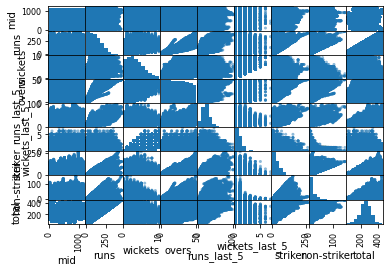

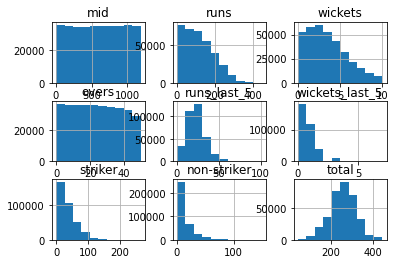

In [5]:
#Data Visualization
scatter_matrix(dataset)
plt.show()
dataset.hist()                       #histogram
plt.show()  

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
X_train, X_test, y_train, y_test

(array([[ 0.09370533,  0.44565669,  0.18010786,  0.84849475,  0.3048047 ],
        [ 0.01649844,  0.44565669, -0.2551692 , -0.89540433, -0.76114359],
        [ 1.97240628,  1.31445566,  1.61933043,  0.35023787, -0.56127828],
        ...,
        [ 0.55694666, -0.85754176,  0.03267531,  2.02295739,  2.56994483],
        [-0.53681759,  0.01125721, -0.47982834, -0.9309941 , -0.76114359],
        [-0.8971164 , -0.85754176, -0.90808481, -0.75304522, -0.02830414]]),
 array([[-0.72983481,  1.31445566, -0.2692104 , -0.468327  , -0.82776536],
        [-0.43387507,  0.88005618, -0.03753067, -0.21919856,  0.1049394 ],
        [-1.23167959, -1.29194125, -1.30123829, -0.78863499, -0.69452182],
        ...,
        [-0.44674289, -1.29194125, -0.96424959,  0.13669921,  1.70386184],
        [-1.41182899, -1.29194125, -1.66630938, -1.2513021 , -0.82776536],
        [-1.30888647, -1.29194125, -1.39250606, -1.00217366, -0.42803475]]),
 array([252, 230, 295, ..., 401, 302, 247]),
 array([ 80, 220, 256, ..

In [9]:
X,y

(array([[0.00e+00, 0.00e+00, 1.00e-01, 0.00e+00, 0.00e+00],
        [0.00e+00, 0.00e+00, 2.00e-01, 0.00e+00, 0.00e+00],
        [4.00e+00, 0.00e+00, 3.00e-01, 0.00e+00, 0.00e+00],
        ...,
        [2.01e+02, 8.00e+00, 4.94e+01, 5.90e+01, 1.80e+01],
        [2.02e+02, 8.00e+00, 4.95e+01, 5.90e+01, 1.80e+01],
        [2.03e+02, 8.00e+00, 4.96e+01, 5.90e+01, 1.80e+01]]),
 array([301, 301, 301, ..., 203, 203, 203]))

In [10]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0

    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [11]:
#Linear Regression
lin = LinearRegression()
lin.fit(X_train,y_train)
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R-squared value:" , score)
lin_acc=custom_accuracy(y_test,y_pred,25)
print("Custom accuracy:" , lin_acc)


R-squared value: 52.737657811129445
Custom accuracy: 51.78797378170419


In [12]:
#Random Forest
ran = RandomForestRegressor(n_estimators=100,max_features=None)
ran.fit(X_train,y_train)
y_pred = ran.predict(X_test)
score = ran.score(X_test,y_test)*100
print("R-squared value:" , score)
ran_acc=custom_accuracy(y_test,y_pred,25)
print("Custom accuracy:" , ran_acc)


R-squared value: 79.48884899367297
Custom accuracy: 81.65289256198346


In [13]:
#K Nearest Neighbours
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
score = knn.score(X_test,y_test)*100
print("R-squared value:" , score)
knn_acc=custom_accuracy(y_test,y_pred,25)
print("Custom accuracy:" , knn_acc)


R-squared value: 64.7044742091764
Custom accuracy: 77.92533485323455


In [14]:
#Lasso Regression
las = Lasso(alpha=0.01, max_iter=10e5)
las.fit(X_train,y_train)
y_pred = las.predict(X_test)
score = las.score(X_test,y_test)*100
print("R-squared value:" , score)
las_acc=custom_accuracy(y_test,y_pred,37)
print("Custom accuracy:" , las_acc)

R-squared value: 52.73751630496808
Custom accuracy: 67.71045882017668


In [15]:
cur_score=int(input('Current Score: '))
cur_wickets=int(input('Current  Wickets: '))
cur_overs=int(input('Current Overs: '))
cur_striker=int(input('Current Striker Score: '))
cur_non_striker=int(input('Current Non-Striker Score: '))

Current Score: 130
Current  Wickets: 7
Current Overs: 30
Current Striker Score: 12
Current Non-Striker Score: 21


In [17]:
if cur_score<cur_striker+cur_non_striker or cur_overs<0 or cur_overs>50:
    print('Error in Input')
else:
    new_prediction = lin.predict(sc.transform(np.array([[cur_score,cur_wickets,cur_overs,cur_striker,cur_non_striker]])))
    print("Linear Regression - Prediction score:" , new_prediction)
    new_prediction = ran.predict(sc.transform(np.array([[cur_score,cur_wickets,cur_overs,cur_striker,cur_non_striker]])))
    print("Random Forest Regression - Prediction score:" , new_prediction)
    new_prediction = knn.predict(sc.transform(np.array([[cur_score,cur_wickets,cur_overs,cur_striker,cur_non_striker]])))
    print("K Nearest Neighbours - Prediction score:" , new_prediction)
    new_prediction = las.predict(sc.transform(np.array([[cur_score,cur_wickets,cur_overs,cur_striker,cur_non_striker]])))
    print("Lasso Regression - Prediction score:" , new_prediction)

Linear Regression - Prediction score: [195.8629067]
Random Forest Regression - Prediction score: [192.66]
K Nearest Neighbours - Prediction score: [172]
Lasso Regression - Prediction score: [195.82747103]


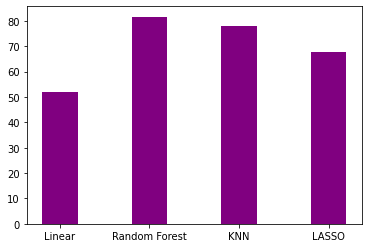

In [18]:
a=[]
a.append(lin_acc)
a.append(ran_acc)
a.append(knn_acc)
a.append(las_acc)
b=['Linear','Random Forest','KNN','LASSO']
plt.bar(b, a, color ='purple',width = 0.4)
plt.show()

In [19]:
class LinearRegression() :
      
    def __init__( self, learning_rate, iterations ) :
          
        self.learning_rate = learning_rate
          
        self.iterations = iterations
          
    # Function for model training
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
          
        # weight initialization
          
        self.W = np.zeros( self.n )
          
        self.b = 0
          
        self.X = X
          
        self.Y = Y
          
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :
              
            self.update_weights()
              
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
          
        # calculate gradients  
      
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
       
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights
      
        self.W = self.W - self.learning_rate * dW
      
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :
      
        return X.dot( self.W ) + self.b

In [20]:
model = LinearRegression(learning_rate=0.01,iterations=1000)

In [22]:
model.fit(X_train,y_train)

In [24]:
new_prediction = model.predict(sc.transform(np.array([[cur_score,cur_wickets,cur_overs,cur_striker,cur_non_striker]])))
print("Linear Regression - Prediction score:" , new_prediction)

Linear Regression - Prediction score: [187.23675722]


In [26]:
model_acc=custom_accuracy(y_test,y_pred,25)
print("Custom accuracy:" , lin_acc)

Custom accuracy: 51.78797378170419


[51.78797378170419, 51.78227415218011]


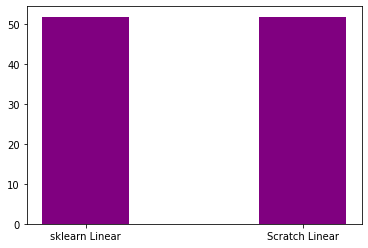

In [29]:
c=[]
c.append(lin_acc)
c.append(model_acc)
d=['sklearn Linear','Scratch Linear']
plt.bar(d, c, color ='purple',width = 0.4)
print(c)
plt.show()